<a href="https://colab.research.google.com/github/M-FoysalAhmed/PyTorch_Deep_Learning/blob/main/Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Give the drive access

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import all the necessary Library

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


# set random seed for reproducibility
torch.manual_seed(10)

**Define the Neural Network architecture**

In [53]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3 * 256 *256, 128)    # Assuming the input images are RGB and 256*256
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)  # Output Layer with 2 classes
        self.softmax = nn.Softmax(dim =1)


    def forward(self, x):
        x = x.view(-1, 3 * 256 * 256)
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x


**set up data transformation**

In [54]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

**Define custom dataset class**

In [55]:
class CustomDataset(Dataset):
    def __init__(self, root, transform =None):
        self.dataset = ImageFolder(root, transform = transform)   # Tis ensure that every image in the dataset is resized, converted to a tensor, and normalized before being used in the training and testing process

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx]



**Define data Loader**

In [56]:
train_dataset = CustomDataset(root ='/content/drive/MyDrive/Flowers_Classification_dataset/train', transform = transform)
test_dataset = CustomDataset(root = '/content/drive/MyDrive/Flowers_Classification_dataset/val', transform = transform)

train_loader = DataLoader(dataset = train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = 64, shuffle =False)


**Instantiate the model, Loss function, and optimizer**

In [57]:
model = SimpleNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)


**Training the model**

In [59]:
num_epochs = 50
train_losse = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    average_train_loss = running_loss / len(train_loader)
    train_losses.append(average_train_loss)


    # validation
    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()

    average_valid_loss = valid_loss / len(test_loader)
    valid_losses.append(average_valid_loss)

    print(f'Epoch [{epoch + 1}/ {num_epochs}], '
          f'Training Loss: {average_train_loss: .4f}, '
          f'Validation Loss: {average_valid_loss: .4f}')


Epoch [1/ 50], Training Loss:  0.7169, Validation Loss:  0.7400
Epoch [2/ 50], Training Loss:  0.7076, Validation Loss:  0.7376
Epoch [3/ 50], Training Loss:  0.7060, Validation Loss:  0.7441
Epoch [4/ 50], Training Loss:  0.7098, Validation Loss:  0.7194
Epoch [5/ 50], Training Loss:  0.6898, Validation Loss:  0.7298
Epoch [6/ 50], Training Loss:  0.6855, Validation Loss:  0.7193
Epoch [7/ 50], Training Loss:  0.6695, Validation Loss:  0.6951
Epoch [8/ 50], Training Loss:  0.6549, Validation Loss:  0.6809
Epoch [9/ 50], Training Loss:  0.6362, Validation Loss:  0.6643
Epoch [10/ 50], Training Loss:  0.6226, Validation Loss:  0.6586
Epoch [11/ 50], Training Loss:  0.6214, Validation Loss:  0.6820
Epoch [12/ 50], Training Loss:  0.6125, Validation Loss:  0.6881
Epoch [13/ 50], Training Loss:  0.6028, Validation Loss:  0.6915
Epoch [14/ 50], Training Loss:  0.5909, Validation Loss:  0.6663
Epoch [15/ 50], Training Loss:  0.5743, Validation Loss:  0.6745
Epoch [16/ 50], Training Loss:  0.

Accuracy:  0.6868, Precision:  0.6873, Recall:  0.6868, F1 Score:  0.6808


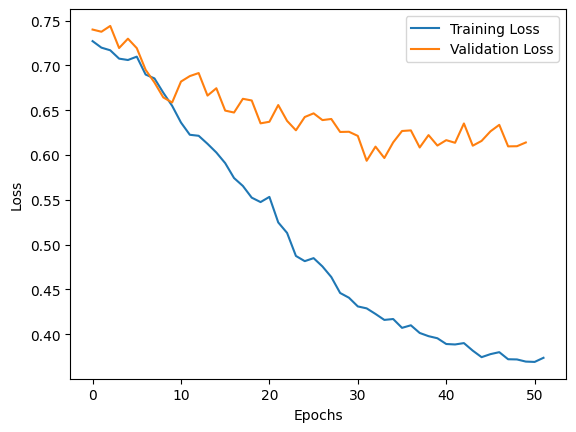

In [61]:
# Evaluate the model
def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())


    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average = 'weighted')
    recall = recall_score(all_labels, all_preds, average = 'weighted')
    f1 = f1_score(all_labels, all_preds, average = 'weighted')

    print(f'Accuracy: {accuracy: .4f}, Precision: {precision: .4f}, Recall: {recall: .4f}, F1 Score: {f1: .4f}')

evaluate_model(model, test_loader)

# Visualize training and validation curve
plt.plot(train_losses, label = 'Training Loss')
plt.plot(valid_losses, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model
torch.save(model.state_dict(), 'binary_classification_model.pth')